In [1]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from aeons.covariance import X_mu, X_Sigmainv, logX_mu
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()
from aeons.models import LS, CG

In [161]:
import matplotlib
matplotlib.use("pgf")
format = {
    # Use LaTeX to write all text
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,
    "font.family": "serif",
    # Use 11pt font in plots, to match 11pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    'axes.linewidth': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'patch.linewidth': 0.5,
    'legend.fancybox': False,
    'legend.shadow': False
}
plt.rcParams.update(format)

In [21]:
def ax_b_like():
    def func(X, theta):
        a, b = theta
        return a*X + b
    def inverse(y, theta):
        a, b = theta
        return (y-b)/a
    def prime(X, theta):
        a, b = theta
        return a * np.ones_like(X)
    return likelihood(func, inverse, prime)
ax_b = ax_b_like()

def Z_theta(theta):
    a, b = theta
    return (np.exp(a) - 1)/a

In [99]:
nk = nk_dead(nlive=100, ndead=1000)
X_mean = X_mu(nk)
X_covinv = X_Sigmainv(nk)

In [113]:
X = generate_Xs(nk)
like = middle
theta_true = [5, 0.1]
y = like.func(X, theta_true)
cg = CG(y, like, X_mean, X_covinv)

In [192]:
X = generate_Xs(nk)
like = middle
theta_true = [5, 0.1]
y = like.func(X, theta_true)
cg = CG(y, like, X_mean, X_covinv)
theta_c = cg.minimise(theta_true)
lines = 100
covtheta = cg.covtheta(theta_c)
sample_func = np.random.multivariate_normal
cov = covtheta

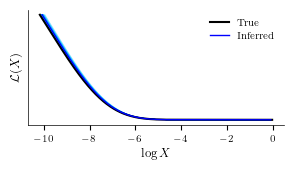

In [193]:
plt.figure(figsize=(3.3, 1.5))
for i in range(lines):
    theta = sample_func(theta_c, cov)
    Xcn = like.inverse(y, theta)
    plt.plot(np.log(Xcn), np.exp(y), lw=.5, color='deepskyblue', alpha=.2)
plt.plot(np.log(X), np.exp(y), color='black', label='True')
plt.plot(np.log(like.inverse(y, theta_c)), np.exp(y), lw=1, color='blue', label='Inferred')
plt.xlabel('$\log X$')
plt.yticks([])
plt.ylabel('$\mathcal{L}(X)$')
plt.legend(frameon=False);
plt.savefig('../../../report/figures/correlated_error_good.pgf', format='pgf', bbox_inches='tight')

In [173]:
%matplotlib inline

In [154]:
X = generate_Xs(nk)
like = middle
theta_true = [5, 0.1]
y = like.func(X, theta_true)
cg = CG(y, like, X_mean, X_covinv)
theta_c = cg.minimise(theta_true)
lines = 100
covtheta = cg.covtheta(theta_c)
sample_func = np.random.multivariate_normal
cov = covtheta


In [162]:
plt.figure(figsize=(3.3, 1.5), dpi=400)
for i in range(lines):
    theta = sample_func(theta_c, cov)
    Xcn = like.inverse(y, theta)
    plt.plot(np.log(Xcn), np.exp(y), lw=.5, color='deepskyblue', alpha=.2)
plt.plot(np.log(X), np.exp(y), color='black', label='True')
plt.plot(np.log(like.inverse(y, theta_c)), np.exp(y), lw=1, color='blue', label='Inferred')
plt.xlabel('$\log X$')
plt.yticks([])
plt.ylabel('$\mathcal{L}(X)$')
plt.legend(frameon=False);
plt.savefig('../../../report/figures/correlated_error_bad.pgf', format='pgf', bbox_inches='tight')

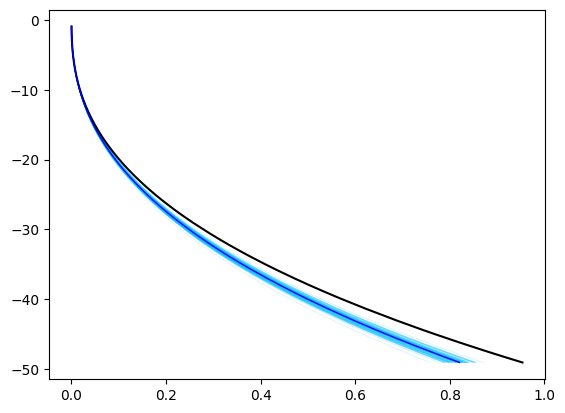

In [81]:
theta_c = cg.minimise(theta_true)
lines = 100
covtheta = cg.covtheta(theta_c)
sample_func = np.random.multivariate_normal
cov = covtheta
for i in range(lines):
    theta = sample_func(theta_c, cov)
    Xcn = like.inverse(y, theta)
    plt.plot(Xcn, y, lw=.5, color='deepskyblue', alpha=.2)
plt.plot(X, y, color='black', label='true')
plt.plot(like.inverse(y, theta_c), y, lw=1, color='blue', label=f'maximum: {np.round(theta_c, 2)}')

#### Linear function **$L(X) = \exp \left( aX + b \right)$**

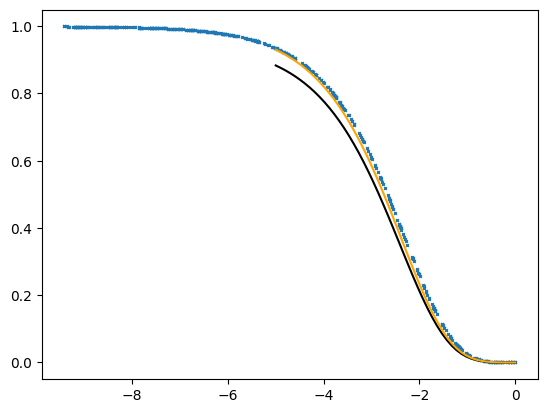

In [59]:
X_sample = generate_Xs(nk)
like = ax_b
theta_true = [-10, 0]
logL = ax_b.func(X_sample, theta_true)
L = np.exp(logL)

ls = LS(logL, like, X_mean)
cg = CG(logL, like, X_mean, X_covinv)
theta_l = ls.minimise(theta_true)
theta_c = cg.minimise(theta_true)
# plt.plot(X_sample, logL, 'x', ms=2)
# plt.plot(like.inverse(logL, theta_l), logL, color='black')
# plt.plot(like.inverse(logL, theta_c), logL, color='orange')

logXarray = np.linspace(-5, 0)
Xarray = np.exp(logXarray)
plt.plot(np.log(X_sample), L, 'x', ms=2)
plt.plot(logXarray, np.exp(ax_b.func(Xarray, theta_l)), color='black')
plt.plot(logXarray, np.exp(ax_b.func(Xarray, theta_c)), color='orange')

In [68]:
Zc = []
Zl = []
for _ in range(20):
    X_sample = generate_Xs(nk)
    like = ax_b
    theta_true = [-2, 0]
    logL = ax_b.func(X_sample, theta_true)
    ls = LS(logL, like, X_mean)
    cg = CG(logL, like, X_mean, X_covinv)
    theta_l = ls.minimise(theta_true)
    theta_c = cg.minimise(theta_true)
    Zl.append(Z_theta(theta_l))
    Zc.append(Z_theta(theta_c))

In [69]:
print("LS:", np.mean(Zl), np.std(Zl))
print("Correlated:", np.mean(Zc), np.std(Zc))

LS: 0.4420796014972871 0.025594869619743266
Correlated: 0.4353306788917674 0.024448556721506053


#### Quadratic smoothing function

$$ \log L = aX^2 + bX + c $$
$$ X = \frac{-b \pm \sqrt{b^2 - 4a(c - \log L)}}{2a} $$

In [94]:
def quadratic_like():
    def func(X, theta):
        a, b, c = theta
        return a * X**2 + b * X + c
    def inverse(y, theta):
        a, b, c = theta
        return (-b + np.sqrt(b**2 - 4*a*(c - y)) )/(2*a)
    def prime(X, theta):
        a, b, c = theta
        return 2*a*X + b * np.ones_like(X)
    return likelihood(func, inverse, prime)
quadratic = quadratic_like()

In [95]:
X_sample = generate_Xs(nk)
like = quadratic
theta_true = [1, 1, 1]
logL = quadratic.func(X_sample, theta_true)
L = np.exp(logL)

ls = LS(logL, like, X_mean)
cg = CG(logL, like, X_mean, X_covinv)
theta_l = ls.minimise(theta_true)
theta_c = cg.minimise(theta_true)

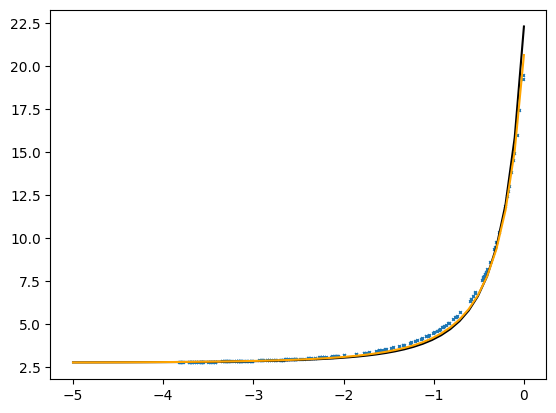

In [97]:
logXarray = np.linspace(-5, 0)
Xarray = np.exp(logXarray)
plt.plot(np.log(X_sample), L, 'x', ms=2)
plt.plot(logXarray, np.exp(like.func(Xarray, theta_l)), color='black')
plt.plot(logXarray, np.exp(like.func(Xarray, theta_c)), color='orange')